### **Task 3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

In [2]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# URL of the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

# Download the ZIP file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# List the files in the ZIP
print(zip_file.namelist())

# Extract and read the CSV file
with zip_file.open('bank-additional/bank-additional-full.csv') as file:
    df = pd.read_csv(file, sep=';')

# Display the first few rows and inspect columns
print(df.head())
print(df.info())


['bank-additional/', 'bank-additional/.DS_Store', '__MACOSX/', '__MACOSX/bank-additional/', '__MACOSX/bank-additional/._.DS_Store', 'bank-additional/.Rhistory', 'bank-additional/bank-additional-full.csv', 'bank-additional/bank-additional-names.txt', 'bank-additional/bank-additional.csv', '__MACOSX/._bank-additional']
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexiste

In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('y_yes', axis=1)  # Features
y = df['y_yes']  # Target variable (whether the customer subscribed or not)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8868657441126487

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238


Confusion Matrix:
 [[6817  486]
 [ 446  489]]


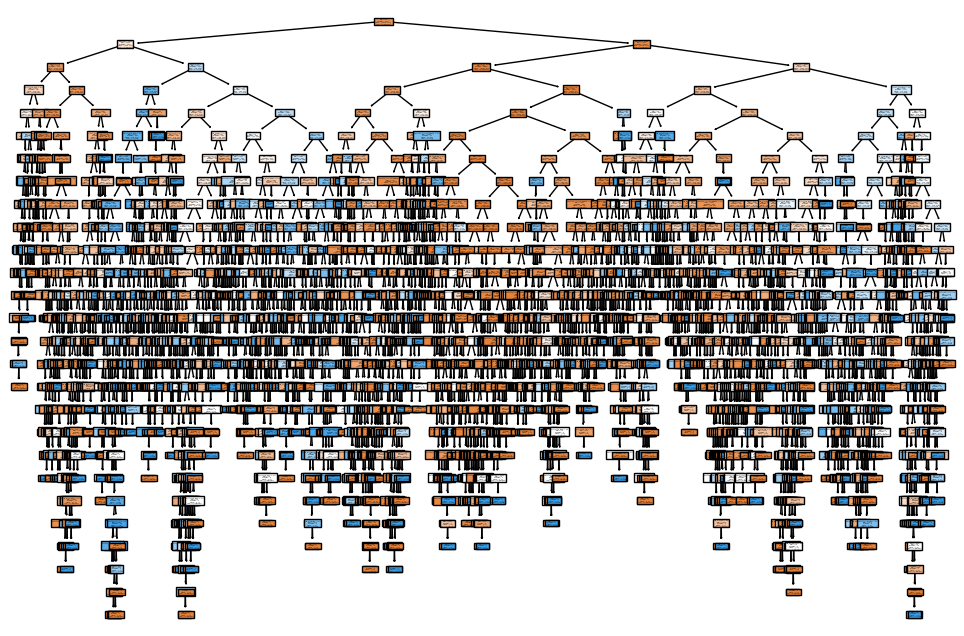

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameters for grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

# Evaluate the model with best parameters
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-validation Score: 0.908103186646434
Accuracy with best parameters: 0.9093226511289147
